# 데이터 파일 불러오기 및 전처리

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [3]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [4]:
# 파일 불러오기
df = pd.read_csv('/content/ai4i2020.csv')

In [5]:
# 데이터 확인
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [6]:
# UDI를 인덱스로
df.set_index('UDI',inplace=True)
# 확인
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [7]:
# 단위 삭제 및 한글화
df.rename(columns={'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature [K]':'기온',
                   'Process temperature [K]':'공정 온도',
                   'Rotational speed [rpm]':'회전 속도',
                   'Torque [Nm]':'회전력',
                   'Tool wear [min]':'공구 마모 시간',
                   'Machine failure':'고장 여부',
                   'TWF':'고장 원인 : 공구 마모',
                   'HDF':'고장 원인 : 열 방산',
                   'PWF':'고장 원인 : 동력 이상',
                   'OSF':'고장 원인 : 과부하',
                   'RNF':'고장 원인 : 무작위'},inplace=True)
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [8]:
# 켈빈(K) 온도에서 섭씨(C) 온도로 변경
df['기온'] = df['기온'] - 273.15
df['공정 온도'] = df['공정 온도'] - 273.15
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


In [9]:
# 고장 여부의 0과 1을 '정상'과 '고장'으로 만든 데이터프레임 생성
df_고장 = copy.deepcopy(df)
df_고장['고장 여부'] = df_고장['고장 여부'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 공구 마모'] = df_고장['고장 원인 : 공구 마모'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 열 방산'] = df_고장['고장 원인 : 열 방산'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 동력 이상'] = df_고장['고장 원인 : 동력 이상'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 과부하'] = df_고장['고장 원인 : 과부하'].apply(lambda x : '고장' if x == 1 else '정상')
df_고장['고장 원인 : 무작위'] = df_고장['고장 원인 : 무작위'].apply(lambda x : '고장' if x == 1 else '정상')
#확인
df_고장

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,정상,정상,정상,정상,정상,정상
2,L47181,L,25.05,35.55,1408,46.3,3,정상,정상,정상,정상,정상,정상
3,L47182,L,24.95,35.35,1498,49.4,5,정상,정상,정상,정상,정상,정상
4,L47183,L,25.05,35.45,1433,39.5,7,정상,정상,정상,정상,정상,정상
5,L47184,L,25.05,35.55,1408,40.0,9,정상,정상,정상,정상,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,정상,정상,정상,정상,정상,정상
9997,H39410,H,25.75,35.25,1632,31.8,17,정상,정상,정상,정상,정상,정상
9998,M24857,M,25.85,35.45,1645,33.4,22,정상,정상,정상,정상,정상,정상


# 기초 분석

In [10]:
# 데이터 정보 확인 / null값 존재 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   제품 ID          10000 non-null  object 
 1   제품 유형          10000 non-null  object 
 2   기온             10000 non-null  float64
 3   공정 온도          10000 non-null  float64
 4   회전 속도          10000 non-null  int64  
 5   회전력            10000 non-null  float64
 6   공구 마모 시간       10000 non-null  int64  
 7   고장 여부          10000 non-null  int64  
 8   고장 원인 : 공구 마모  10000 non-null  int64  
 9   고장 원인 : 열 방산   10000 non-null  int64  
 10  고장 원인 : 동력 이상  10000 non-null  int64  
 11  고장 원인 : 과부하    10000 non-null  int64  
 12  고장 원인 : 무작위    10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [11]:
# 대이터 개관 확인
df.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,26.854930,36.855560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.150000,35.650000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,28.350000,37.950000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,31.350000,40.650000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


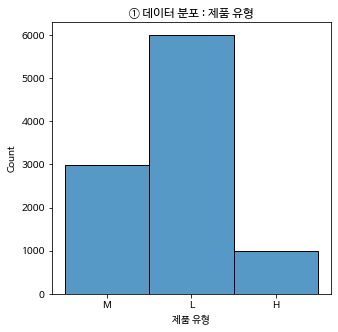

In [12]:
# 변인 분포 시각화1
fig = plt.figure(figsize=(5,5))

plt.title('① 데이터 분포 : 제품 유형')

sns.histplot(df['제품 유형'])

# plt.savefig('data_type.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

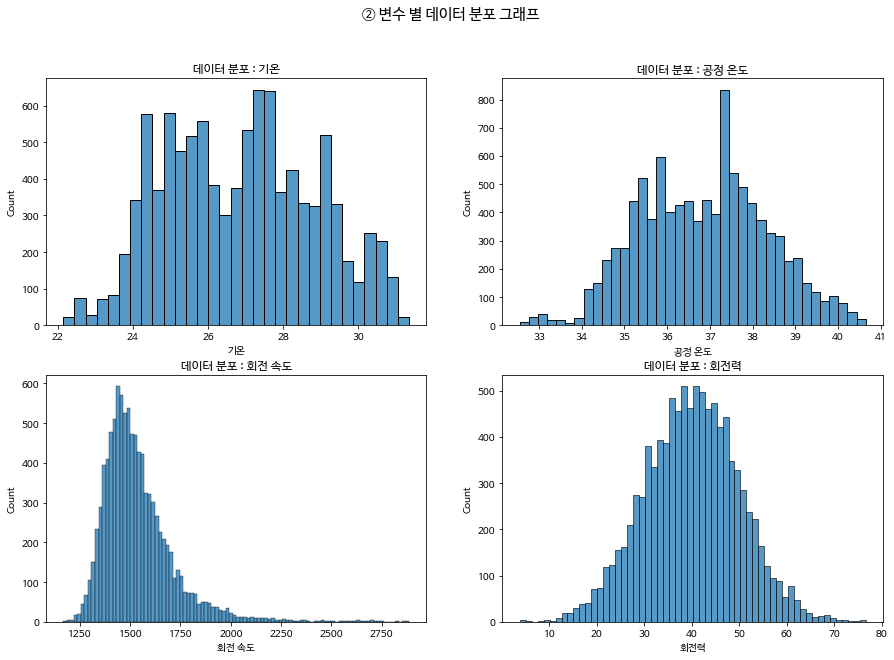

In [13]:
# 변인 분포 시각화2
fig = plt.figure(figsize=(15,10))

fig.suptitle('② 변수 별 데이터 분포 그래프', size=15)

ax2=fig.add_subplot(2,2,1)
ax3=fig.add_subplot(2,2,2)
ax4=fig.add_subplot(2,2,3)
ax5=fig.add_subplot(2,2,4)

ax2.set(title='데이터 분포 : 기온')
ax3.set(title='데이터 분포 : 공정 온도')
ax4.set(title='데이터 분포 : 회전 속도')
ax5.set(title='데이터 분포 : 회전력')

sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['회전력'],ax=ax5)

# plt.savefig('data_distribution.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

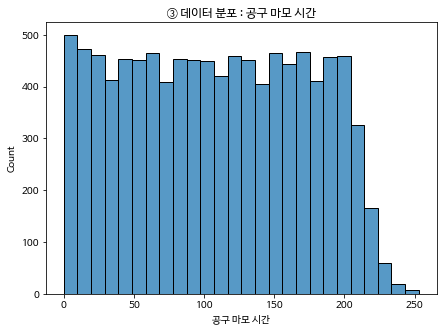

In [14]:
# 변인 분포 시각화3
fig = plt.figure(figsize=(7,5))

plt.title('③ 데이터 분포 : 공구 마모 시간')

sns.histplot(df['공구 마모 시간'])

# plt.savefig('data_toolwear.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

In [15]:
# 고장 원인 갯수 세기
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                        268549.3
공정 온도                                                     368555.6
회전 속도                                                     15387761
회전력                                                       399869.1
공구 마모 시간                                                   1079510
고장 여부                                                          339
고장 원인 : 공구 마모                                                   46
고장 원인 : 열 방산                                                   115
고장 원인 : 동력 이상                                                   95
고장 원인 : 과부하                                                     98
고장 원인 : 무작위                                                     19
dtype: object

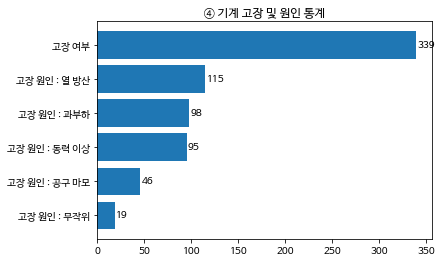

In [16]:
# 고장 원인 갯수 시각화
y = df[['고장 여부', '고장 원인 : 공구 마모', '고장 원인 : 열 방산', '고장 원인 : 동력 이상', '고장 원인 : 과부하', '고장 원인 : 무작위']].sum().sort_values().index
x = df[['고장 여부', '고장 원인 : 공구 마모', '고장 원인 : 열 방산', '고장 원인 : 동력 이상', '고장 원인 : 과부하', '고장 원인 : 무작위']].sum().sort_values().values

plt.barh(y, x)

for i in range(len(x)):
    plt.text(x=x[i]+1, y=i, s=x[i], ha='left', va='center')

plt.title('④ 기계 고장 및 원인 통계')

# plt.savefig('machine_failure.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

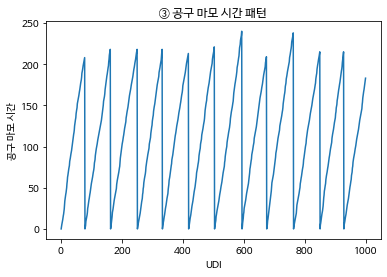

In [62]:
# 공구 마모 시간 패턴
x = df_고장[df_고장.index < 1000].index
y = df_고장[df_고장.index < 1000]['공구 마모 시간']
hue_data = df_고장[df_고장.index < 1000]['고장 여부']

sns.lineplot(x=x, y=y)

plt.title('③ 공구 마모 시간 패턴')
plt.xlabel('UDI')
plt.ylabel('공구 마모 시간')

# plt.savefig('pattern:TW_base.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

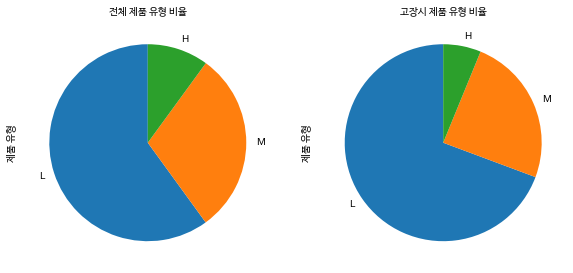

In [17]:
# 실패 여부에 따른 제품 유형 비율 파이 차트
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)

df['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax1)
df[df['고장 여부']==1]['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax2)

ax1.set_title('전체 제품 유형 비율', size=10)
ax2.set_title('고장시 제품 유형 비율', size=10)

plt.show()

# 심화 분석

In [18]:
# 상관관계 그래프 분석
# 전체 고장들과 변수간 상관계수 분석을 위한 컬럼 생성
df['고장 요인 합계'] = df['고장 원인 : 열 방산'] + df['고장 원인 : 과부하'] + df['고장 원인 : 동력 이상'] + df['고장 원인 : 공구 마모'] + df['고장 원인 : 무작위']

In [19]:
# 기계 고장 발생 데이터 및 그룹 생성
df_failure =df.groupby('고장 여부') 
df_fail_1=df_failure.get_group(1)
df_fail_0=df_failure.get_group(0)
data_failure_Total = df_fail_1[['고장 요인 합계','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


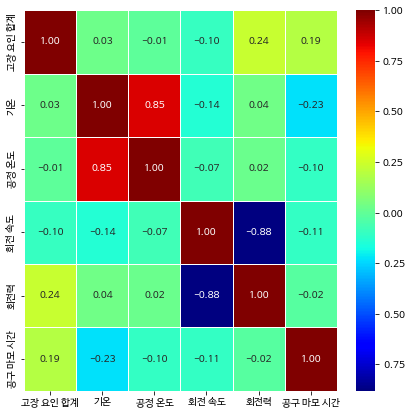

In [20]:
# 고장 원인 전체와 변수간 상관 관계 heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(data = data_failure_Total.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='jet')

<AxesSubplot:>

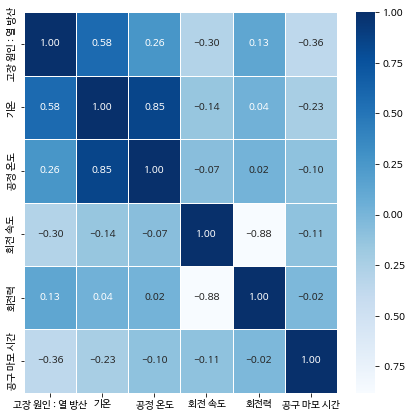

In [21]:
# 열방산 고장 변수들과의 상관 관계 시각화
data_HDF = df_fail_1[['고장 원인 : 열 방산','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_HDF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
#plt.savefig('열방산_수정1', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:>

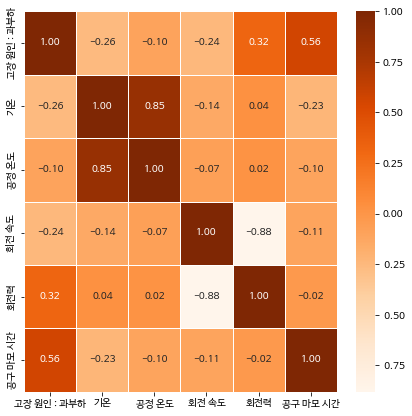

In [22]:
# 과부하 고장 변수들과의 상관 관계 시각화
data_OSF = df_fail_1[['고장 원인 : 과부하','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_OSF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Oranges')
#plt.savefig('과부하_수정1-1', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:>

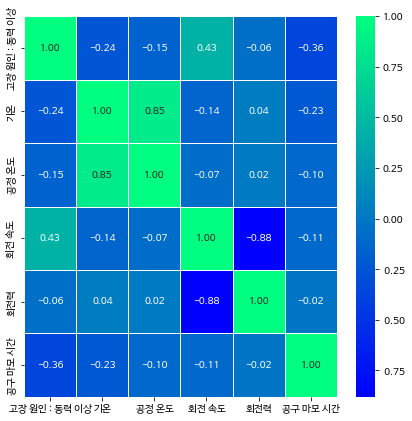

In [23]:
# 동력 이상 고장 변수들과의 상관 관계 시각화
data_PWF = df_fail_1[['고장 원인 : 동력 이상','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(7,7))
sns.heatmap(data = data_PWF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='winter')
#plt.savefig('동력이상_수정1-1', transparent=True) -> PT 발표 자료 추출

In [37]:
# 정상 제품과 고장원인 별 최소값, 평균, 최대값 차이 표 작성을 위한  데이터 생성 
df_HDF = df.loc[df['고장 원인 : 열 방산'] == 1].copy()
df_PWF = df.loc[df['고장 원인 : 동력 이상'] == 1].copy()
df_OSF = df.loc[df['고장 원인 : 과부하'] == 1].copy()
df_RNF = df.loc[df['고장 원인 : 무작위'] == 1].copy()

In [38]:
# 고장 원인 : 열 방산일 때의 각 변수 통계
dict_data = {'최소':[df[df['고장 원인 : 열 방산'] == 1]['기온'].min(), df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].min(),
             df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].min(), df[df['고장 원인 : 열 방산'] == 1]['회전력'].min()],
             '평균':[round(df[df['고장 원인 : 열 방산'] == 1]['기온'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['기온']), 2),
                   round(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공정 온도']), 2),
                   round(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전 속도']), 2),
                   round(df[df['고장 원인 : 열 방산'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전력']), 2)],
             '최대':[df[df['고장 원인 : 열 방산'] == 1]['기온'].max(), df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].max(),
             df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].max(), df[df['고장 원인 : 열 방산'] == 1]['회전력'].max()]}
df_HDF_fig = pd.DataFrame(dict_data, index=['기온','공정온도','회전속도','회전력'])
df_HDF_fig

,최소,평균,최대
기온,27.65,29.41,30.55
공정온도,36.25,37.64,39.05
회전속도,1212.00,1337.26,1379.00
회전력,41.60,53.17,68.20


In [39]:
# 고장 원인 : 과부하일 때의 각 변수 통계
dict_data = {'최소':[df[df['고장 원인 : 과부하'] == 1]['기온'].min(), df[df['고장 원인 : 과부하'] == 1]['공정 온도'].min(),
             df[df['고장 원인 : 과부하'] == 1]['회전 속도'].min(), df[df['고장 원인 : 과부하'] == 1]['회전력'].min()],
             '평균':[round(df[df['고장 원인 : 과부하'] == 1]['기온'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['기온']), 2),
                   round(df[df['고장 원인 : 과부하'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공정 온도']), 2),
                   round(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전 속도']), 2),
                   round(df[df['고장 원인 : 과부하'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전력']), 2)],
             '최대':[df[df['고장 원인 : 과부하'] == 1]['기온'].max(), df[df['고장 원인 : 과부하'] == 1]['공정 온도'].max(),
             df[df['고장 원인 : 과부하'] == 1]['회전 속도'].max(), df[df['고장 원인 : 과부하'] == 1]['회전력'].max()]}
df_HDF_fig = pd.DataFrame(dict_data, index=['기온','공정온도','회전속도','회전력'])
df_HDF_fig

,최소,평균,최대
기온,22.45,26.89,30.85
공정온도,32.95,36.92,39.95
회전속도,1181.00,1350.33,1515.00
회전력,46.30,58.37,75.40


In [40]:
# 고장 원인 : 동력 이상일 때의 각 변수 통계
dict_data = {'최소':[df[df['고장 원인 : 동력 이상'] == 1]['기온'].min(), df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].min(),
             df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].min(), df[df['고장 원인 : 동력 이상'] == 1]['회전력'].min(),
             df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].min()],
             '평균':[round(df[df['고장 원인 : 동력 이상'] == 1]['기온'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['기온']), 2),
                   round(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도']), 2),
                   round(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도']), 2),
                   round(df[df['고장 원인 : 동력 이상'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전력']), 2),
                   round(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간']), 2)],
             '최대':[df[df['고장 원인 : 동력 이상'] == 1]['기온'].max(), df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].max(),
             df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].max(), df[df['고장 원인 : 동력 이상'] == 1]['회전력'].max(),
             df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].max()]}
df_HDF_fig = pd.DataFrame(dict_data, index=['기온','공정온도','회전속도','회전력','공구 마모 시간'])
df_HDF_fig

,최소,평균,최대
기온,22.55,26.93,30.85
공정온도,33.05,36.80,40.05
회전속도,1200.00,1763.97,2886.00
회전력,3.80,48.51,76.60
공구 마모 시간,0.00,101.88,234.00


In [41]:
# 정상 제품 최소, 평균, 최대 값
df_fail_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
기온,9661.0,26.823999,1.990748,22.15,25.15,26.85,28.35,31.35
공정 온도,9661.0,36.845570,1.486846,32.55,35.65,36.85,37.95,40.65
회전 속도,9661.0,1540.260014,167.394734,1168.00,1429.00,1507.00,1615.00,2695.00
회전력,9661.0,39.629655,9.472080,12.60,33.10,39.90,46.30,70.00
공구 마모 시간,9661.0,106.693717,62.945790,0.00,52.00,107.00,160.00,246.00
고장 여부,9661.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
고장 원인 : 공구 마모,9661.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
고장 원인 : 열 방산,9661.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
고장 원인 : 동력 이상,9661.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
고장 원인 : 과부하,9661.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [42]:
# 열방산과 정상 제품 최소, 평균, 최대 값차이
df_HDF.describe().transpose() - df_fail_0.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
기온,-9546.0,2.586871,-1.388895,5.5,3.8,2.5,1.55,-0.8
공정 온도,-9546.0,0.793126,-0.842333,3.7,1.5,0.7,0.20,-1.6
회전 속도,-9546.0,-202.999145,-132.648767,44.0,-110.0,-161.0,-251.50,-1316.0
회전력,-9546.0,13.537301,-3.248586,29.0,15.1,12.7,10.75,-1.8
공구 마모 시간,-9546.0,0.497587,0.683467,2.0,5.0,-1.0,1.00,-17.0
고장 여부,-9546.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
고장 원인 : 공구 마모,-9546.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
고장 원인 : 열 방산,-9546.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
고장 원인 : 동력 이상,-9546.0,0.026087,0.160092,0.0,0.0,0.0,0.00,1.0
고장 원인 : 과부하,-9546.0,0.052174,0.223351,0.0,0.0,0.0,0.00,1.0


In [43]:
# 과부하와 정상 제품 최소, 평균, 최대 값차이
df_OSF.describe().transpose() - df_fail_0.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
기온,-9563.0,0.070899,0.037817,0.3,0.125,0.05,0.175,-0.5
공정 온도,-9563.0,0.077900,0.024182,0.4,-0.075,0.10,0.075,-0.7
회전 속도,-9563.0,-189.933484,-106.143893,13.0,-116.000,-146.50,-232.750,-1180.0
회전력,-9563.0,18.740753,-3.528493,33.7,20.725,17.80,15.375,5.4
공구 마모 시간,-9563.0,101.000161,-47.134788,172.0,145.000,100.00,56.000,7.0
고장 여부,-9563.0,1.000000,0.000000,1.0,1.000,1.00,1.000,1.0
고장 원인 : 공구 마모,-9563.0,0.030612,0.173150,0.0,0.000,0.00,0.000,1.0
고장 원인 : 열 방산,-9563.0,0.061224,0.240974,0.0,0.000,0.00,0.000,1.0
고장 원인 : 동력 이상,-9563.0,0.122449,0.329489,0.0,0.000,0.00,0.000,1.0
고장 원인 : 과부하,-9563.0,1.000000,0.000000,1.0,1.000,1.00,1.000,1.0


In [44]:
# 동력 이상과 정상 제품 최소, 평균, 최대 값차이
df_PWF.describe().transpose() - df_fail_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
기온,-9566.0,0.101791,0.156379,0.4,0.1,0.4,0.3,-0.5
공정 온도,-9566.0,-0.040833,0.113604,0.5,-0.1,0.2,-0.1,-0.6
회전 속도,-9566.0,223.708407,453.434404,32.0,-116.5,-121.0,948.5,191.0
회전력,-9566.0,8.885082,17.316572,-8.8,-20.3,23.7,22.1,6.6
공구 마모 시간,-9566.0,-4.809506,1.409914,0.0,-1.5,-7.0,-10.0,-12.0
고장 여부,-9566.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
고장 원인 : 공구 마모,-9566.0,0.010526,0.102598,0.0,0.0,0.0,0.0,1.0
고장 원인 : 열 방산,-9566.0,0.031579,0.175804,0.0,0.0,0.0,0.0,1.0
고장 원인 : 동력 이상,-9566.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
고장 원인 : 과부하,-9566.0,0.126316,0.333967,0.0,0.0,0.0,0.0,1.0


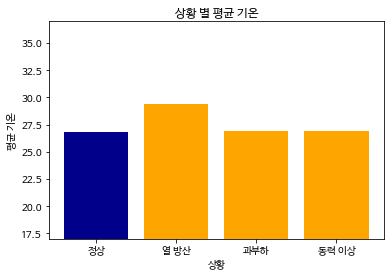

In [45]:
# 상황 별 기온 평균 시각화
x = ['정상', '열 방산', '과부하', '동력 이상']
y = [df[df['고장 여부'] == 0]['기온'].sum() / len(df[df['고장 여부'] == 0]['기온']),
     df[df['고장 원인 : 열 방산'] == 1]['기온'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['기온']),
     df[df['고장 원인 : 과부하'] == 1]['기온'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['기온']),
     df[df['고장 원인 : 동력 이상'] == 1]['기온'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['기온'])]

plt.bar(x, y, color='orange')

plt.bar(x[0], y[0], color='darkblue')

plt.ylim(17, 37)

plt.title('상황 별 평균 기온')
plt.xlabel('상황')
plt.ylabel('평균 기온')

# plt.savefig('aver:temp.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

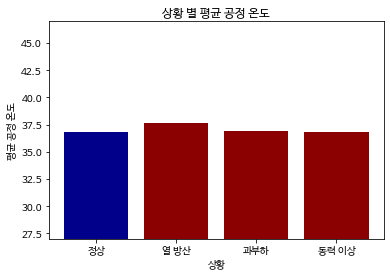

In [46]:
# 상황 별 공정 온도 평균 시각화
x = ['정상', '열 방산', '과부하', '동력 이상']
y = [df[df['고장 여부'] == 0]['공정 온도'].sum() / len(df[df['고장 여부'] == 0]['공정 온도']),
     df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공정 온도']),
     df[df['고장 원인 : 과부하'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공정 온도']),
     df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'])]

plt.bar(x, y, color='darkred')

plt.bar(x[0], y[0], color='darkblue')

plt.ylim(27, 47)

plt.title('상황 별 평균 공정 온도')
plt.xlabel('상황')
plt.ylabel('평균 공정 온도')

# plt.savefig('aver:PT.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

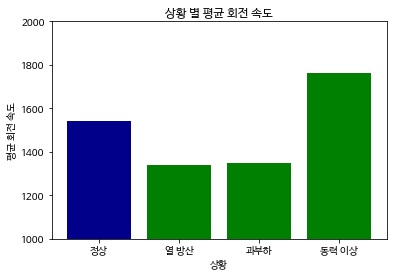

In [47]:
# 상황 별 회전 속도 평균 시각화
x = ['정상', '열 방산', '과부하', '동력 이상']
y = [df[df['고장 여부'] == 0]['회전 속도'].sum() / len(df[df['고장 여부'] == 0]['회전 속도']),
     df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전 속도']),
     df[df['고장 원인 : 과부하'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전 속도']),
     df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'])]

plt.bar(x, y, color='green')

plt.bar(x[0], y[0], color='darkblue')

plt.ylim(1000, 2000)

plt.title('상황 별 평균 회전 속도')
plt.xlabel('상황')
plt.ylabel('평균 회전 속도')

# plt.savefig('aver:RS.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

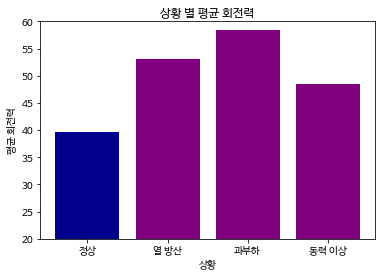

In [48]:
# 상황 별 회전력 평균 시각화
x = ['정상', '열 방산', '과부하', '동력 이상']
y = [df[df['고장 여부'] == 0]['회전력'].sum() / len(df[df['고장 여부'] == 0]['회전력']),
     df[df['고장 원인 : 열 방산'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전력']),
     df[df['고장 원인 : 과부하'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전력']),
     df[df['고장 원인 : 동력 이상'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전력'])]

plt.bar(x, y, color='purple')

plt.bar(x[0], y[0], color='darkblue')

plt.ylim(20, 60)

plt.title('상황 별 평균 회전력')
plt.xlabel('상황')
plt.ylabel('평균 회전력')

# plt.savefig('aver:Torque.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

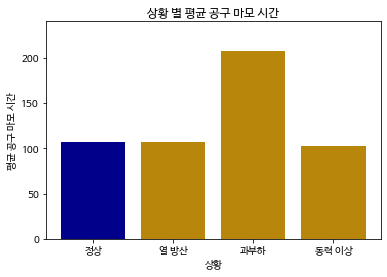

In [36]:
# 상황 별 공구 마모 시간 평균 시각화
x = ['정상', '열 방산', '과부하', '동력 이상']
y = [df[df['고장 여부'] == 0]['공구 마모 시간'].sum() / len(df[df['고장 여부'] == 0]['공구 마모 시간']),
     df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간']),
     df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간']),
     df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'])]

plt.bar(x, y, color='darkgoldenrod')

plt.bar(x[0], y[0], color='darkblue')

plt.ylim(0, 240)

plt.title('상황 별 평균 공구 마모 시간')
plt.xlabel('상황')
plt.ylabel('평균 공구 마모 시간')

# plt.savefig('aver:ToolWear.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

<AxesSubplot:title={'center':'데이터 비교 : 열방산 / 공구 마모 시간'}, xlabel='고장 원인 : 열 방산', ylabel='공구 마모 시간'>

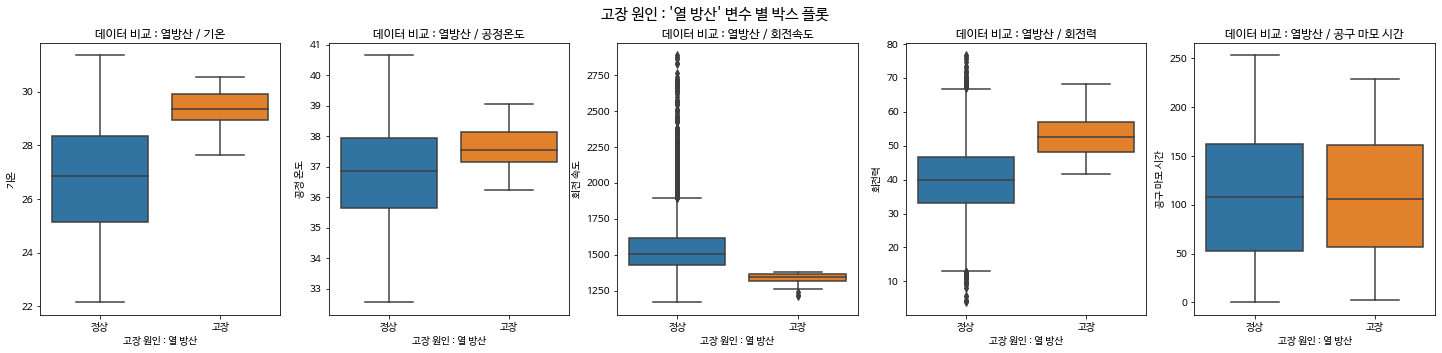

In [49]:
# 각 변수들과 '고장 원인 : 열 방산'과의 박스플롯
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '열 방산' 변수 별 박스 플롯", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 열방산 / 기온')
ax2.set(title='데이터 비교 : 열방산 / 공정온도')
ax3.set(title='데이터 비교 : 열방산 / 회전속도')
ax4.set(title='데이터 비교 : 열방산 / 회전력')
ax5.set(title='데이터 비교 : 열방산 / 공구 마모 시간')

sns.boxplot(x='고장 원인 : 열 방산', y='기온', data=df_고장, ax=ax1)
sns.boxplot(x='고장 원인 : 열 방산', y='공정 온도', data=df_고장, ax=ax2)
sns.boxplot(x='고장 원인 : 열 방산', y='회전 속도', data=df_고장, ax=ax3)
sns.boxplot(x='고장 원인 : 열 방산', y='회전력', data=df_고장, ax=ax4)
sns.boxplot(x='고장 원인 : 열 방산', y='공구 마모 시간', data=df_고장, ax=ax5)

# plt.savefig('HDF:box.png', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:title={'center':'데이터 비교 : 과부하 / 공구 마모 시간'}, xlabel='고장 원인 : 과부하', ylabel='공구 마모 시간'>

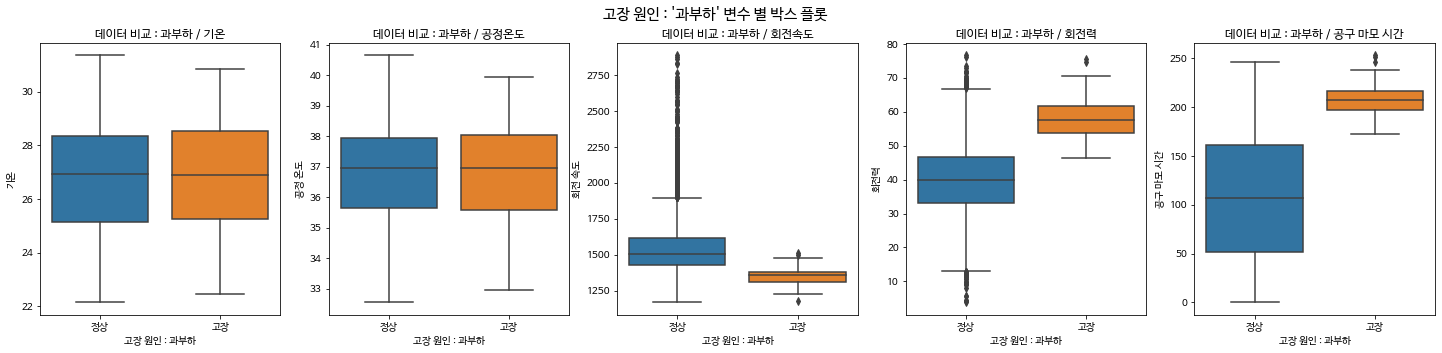

In [50]:
# 각 변수들과 '고장 원인 : 과부하'과의 박스플롯
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '과부하' 변수 별 박스 플롯", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 과부하 / 기온')
ax2.set(title='데이터 비교 : 과부하 / 공정온도')
ax3.set(title='데이터 비교 : 과부하 / 회전속도')
ax4.set(title='데이터 비교 : 과부하 / 회전력')
ax5.set(title='데이터 비교 : 과부하 / 공구 마모 시간')

sns.boxplot(x='고장 원인 : 과부하', y='기온', data=df_고장, ax=ax1)
sns.boxplot(x='고장 원인 : 과부하', y='공정 온도', data=df_고장, ax=ax2)
sns.boxplot(x='고장 원인 : 과부하', y='회전 속도', data=df_고장, ax=ax3)
sns.boxplot(x='고장 원인 : 과부하', y='회전력', data=df_고장, ax=ax4)
sns.boxplot(x='고장 원인 : 과부하', y='공구 마모 시간', data=df_고장, ax=ax5)

# plt.savefig('OSF:box.png', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:title={'center':'데이터 비교 : 동력 이상 / 공구 마모 시간'}, xlabel='고장 원인 : 동력 이상', ylabel='공구 마모 시간'>

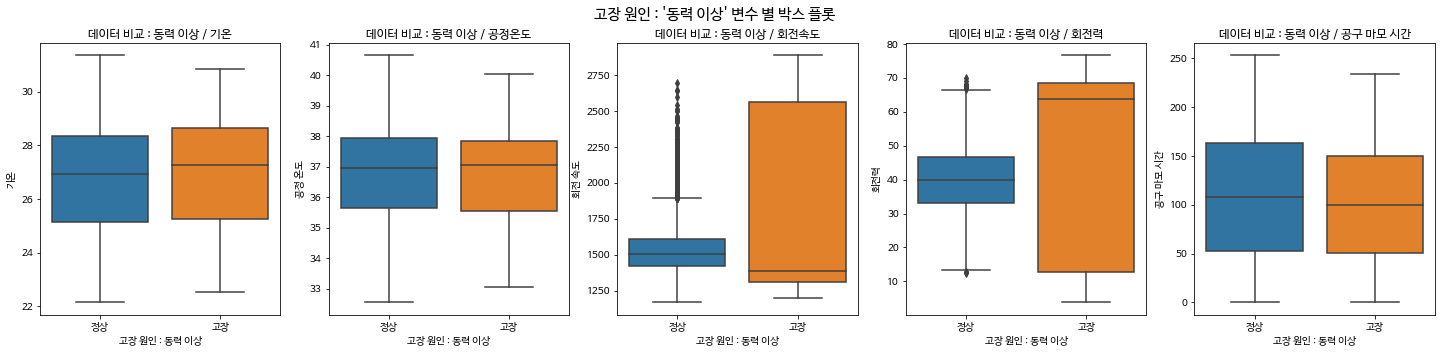

In [51]:
# 각 변수들과 '고장 원인 : 동력 이상'과의 박스플롯
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '동력 이상' 변수 별 박스 플롯", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 동력 이상 / 기온')
ax2.set(title='데이터 비교 : 동력 이상 / 공정온도')
ax3.set(title='데이터 비교 : 동력 이상 / 회전속도')
ax4.set(title='데이터 비교 : 동력 이상 / 회전력')
ax5.set(title='데이터 비교 : 동력 이상 / 공구 마모 시간')

sns.boxplot(x='고장 원인 : 동력 이상', y='기온', data=df_고장, ax=ax1)
sns.boxplot(x='고장 원인 : 동력 이상', y='공정 온도', data=df_고장, ax=ax2)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전 속도', data=df_고장, ax=ax3)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전력', data=df_고장, ax=ax4)
sns.boxplot(x='고장 원인 : 동력 이상', y='공구 마모 시간', data=df_고장, ax=ax5)

# plt.savefig('PWF:box.png', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:title={'center':'데이터 비교 : 열방산 / 공구 마모 시간'}, xlabel='공구 마모 시간', ylabel='고장 원인 : 열 방산'>

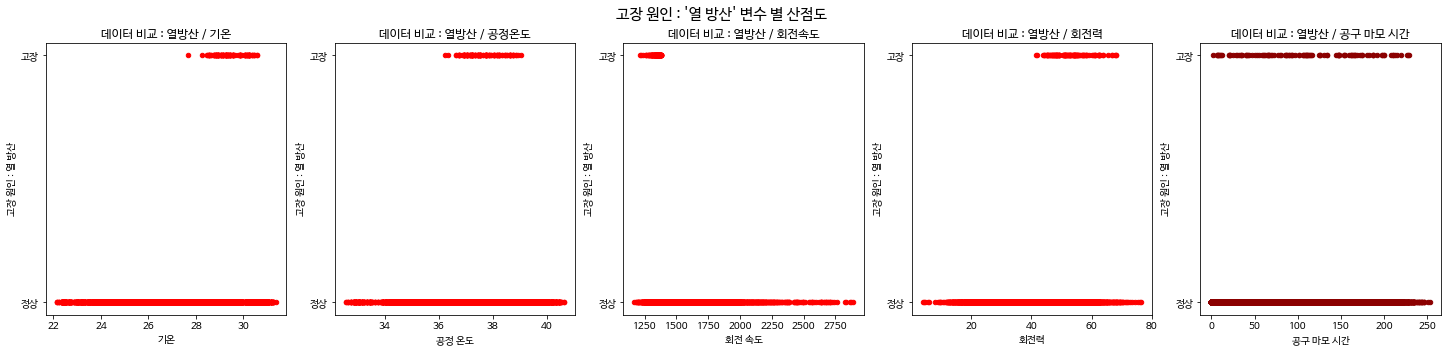

In [52]:
# 고장 원인 : 열 방산 변수 별 산점도
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '열 방산' 변수 별 산점도", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 열방산 / 기온')
ax2.set(title='데이터 비교 : 열방산 / 공정온도')
ax3.set(title='데이터 비교 : 열방산 / 회전속도')
ax4.set(title='데이터 비교 : 열방산 / 회전력')
ax5.set(title='데이터 비교 : 열방산 / 공구 마모 시간')

df_고장.plot(x='기온', y='고장 원인 : 열 방산', kind='scatter', ax=ax1, c='red')
df_고장.plot(x='공정 온도', y='고장 원인 : 열 방산', kind='scatter', ax=ax2, c='red')
df_고장.plot(x='회전 속도', y='고장 원인 : 열 방산', kind='scatter', ax=ax3, c='red')
df_고장.plot(x='회전력', y='고장 원인 : 열 방산', kind='scatter', ax=ax4, c='red')
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 열 방산', kind='scatter', ax=ax5, c='darkred')

# plt.savefig('HDF:scatter.png', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:title={'center':'데이터 비교 : 과부하 / 공구 마모 시간'}, xlabel='공구 마모 시간', ylabel='고장 원인 : 과부하'>

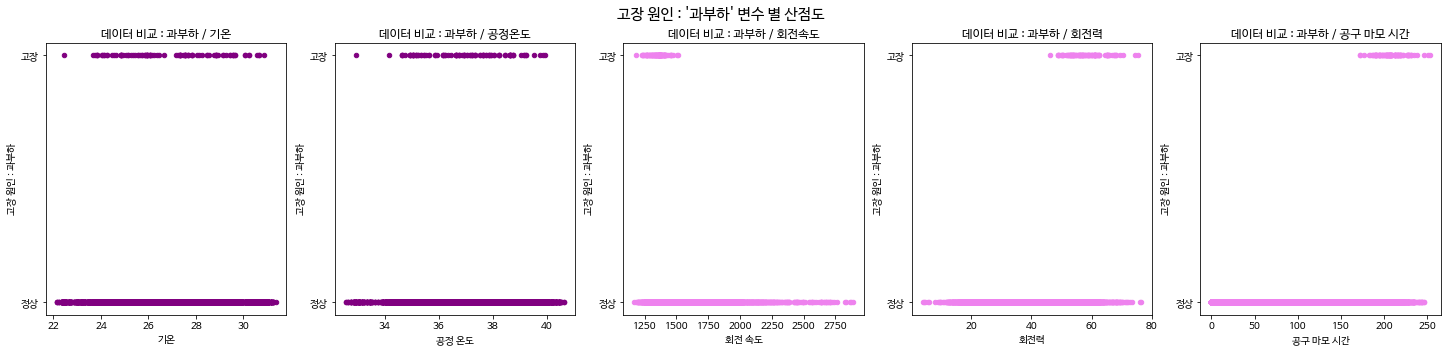

In [53]:
# 고장 원인 : 과부하 변수 별 산점도
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '과부하' 변수 별 산점도", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 과부하 / 기온')
ax2.set(title='데이터 비교 : 과부하 / 공정온도')
ax3.set(title='데이터 비교 : 과부하 / 회전속도')
ax4.set(title='데이터 비교 : 과부하 / 회전력')
ax5.set(title='데이터 비교 : 과부하 / 공구 마모 시간')

df_고장.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', ax=ax1, c='purple')
df_고장.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter', ax=ax2, c='purple')
df_고장.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', ax=ax3, c='violet')
df_고장.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', ax=ax4, c='violet')
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', ax=ax5, c='violet')

# plt.savefig('OSF:scatter.png', transparent = 'True') -> PT 발표 자료 추출

<AxesSubplot:title={'center':'데이터 비교 : 과부하 / 공구 마모 시간'}, xlabel='공구 마모 시간', ylabel='고장 원인 : 과부하'>

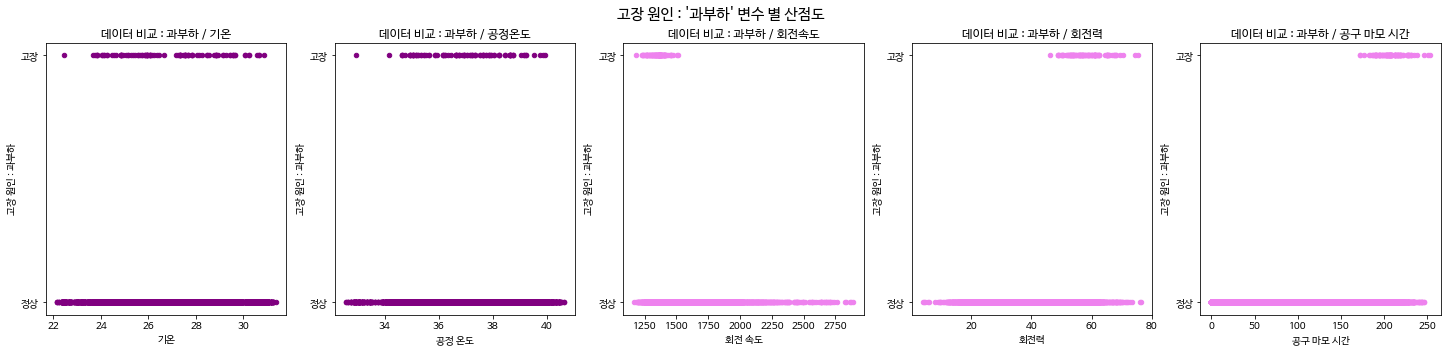

In [54]:
# 고장 원인 : 동력 이상 변수 별 산점도
fig = plt.figure(figsize=(25,5))

fig.suptitle("고장 원인 : '과부하' 변수 별 산점도", size=15)

ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

ax1.set(title='데이터 비교 : 과부하 / 기온')
ax2.set(title='데이터 비교 : 과부하 / 공정온도')
ax3.set(title='데이터 비교 : 과부하 / 회전속도')
ax4.set(title='데이터 비교 : 과부하 / 회전력')
ax5.set(title='데이터 비교 : 과부하 / 공구 마모 시간')

df_고장.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', ax=ax1, c='purple')
df_고장.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter', ax=ax2, c='purple')
df_고장.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', ax=ax3, c='violet')
df_고장.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', ax=ax4, c='violet')
df_고장.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', ax=ax5, c='violet')

# plt.savefig('OSF:scatter.png', transparent = 'True') -> PT 발표 자료 추출

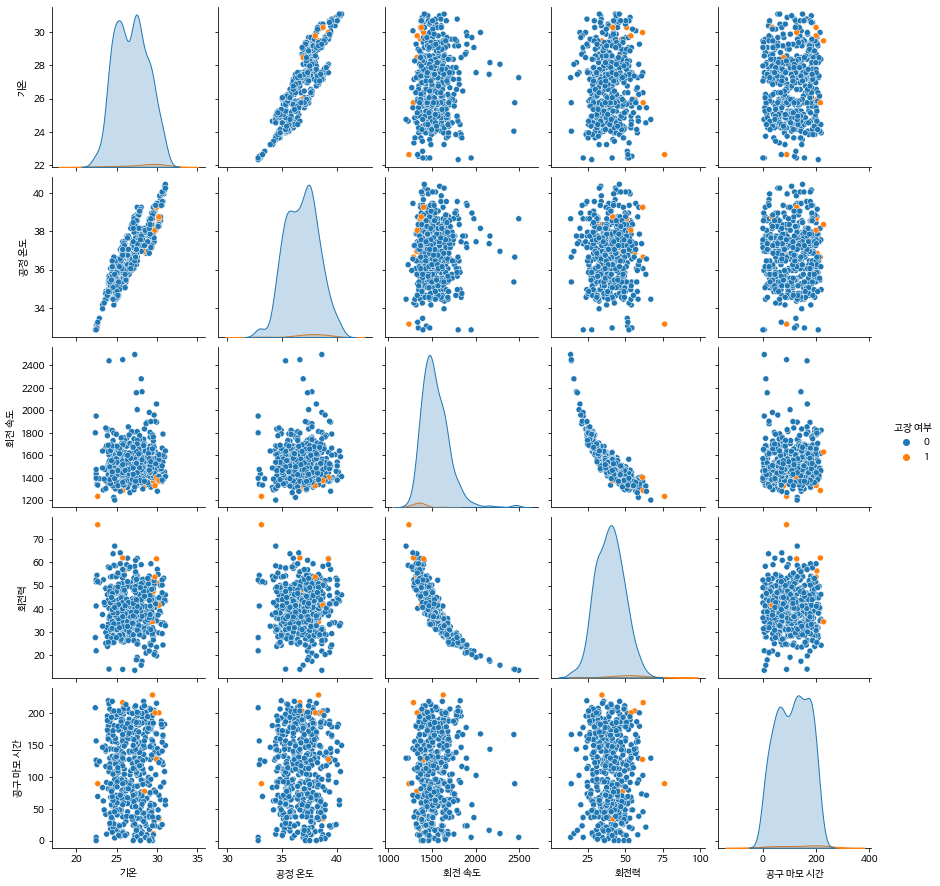

In [55]:
# 페어플롯
sns.pairplot(df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간', '고장 여부']].sample(frac=0.05), hue='고장 여부')

## 고장 원인과 변수간 관계 분포 해석

In [ ]:
# 고장 원인 : 열 방산의 경우
# 기온과의 상관계수가 가장 높으며,
# 기온이 27.65도 이상, 공정온도 36.25도 이상, 회전속도 1379 rpm 이하, 회전력 41.6Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다

In [ ]:
# 고장 원인 : 과부하의 경우
# 공구 마모 시간과의 상관계수가 가장 높으며,
# 회전속도 1515 rpm 이하, 회전력 46.3Nm 이상, 공구 마모 시간 172min 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

In [ ]:
# 고장 원인 : 동력 이상의 경우
# 회전속도와 가장 높은 상관계수를 가지며,
# 회전속도 1479 rpm 이하 또는 2153 rpm 이상, 회전력 15.3Nm 이하 또는 58.5Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

In [ ]:
# 종합해 봤을 때, 고장을 막기 위해서는
# 기온은 27.65도, 공정 온도는 36.25도를 넘기지 않는 환경에서,
# 회전속도는 1515~2153rpm 수준으로, 회전력은 15.3~46.3Nm 수준으로 유지하고,
# 공구 마모 시간은 172min을 넘기지 않도록 하는 것이 방안이 될 수 있겠다.

# 랜덤 고장 (이상치 데이터) 분석  

In [57]:
# 고장 가운데 고장 원인이 없는 이상치 데이터 9개 확인 및 추출  
df_failure_add = df[(df['고장 여부']==1) & (df['고장 원인 : 공구 마모']==0) & (df['고장 원인 : 열 방산']==0) & (df['고장 원인 : 동력 이상']==0) & (df['고장 원인 : 과부하']==0) & (df['고장 원인 : 무작위']==0)].copy()

In [58]:
# 전처리 
# 이상치 데이터값 랜덤 고장과 동일하게 수정 (고장여부: 1 -> 0 / 무작위 : 0 -> 1) 
df_failure_add['고장 여부'].replace(1,0, inplace = True)
df_failure_add['고장 원인 : 무작위'].replace(0,1, inplace = True)
df_failure_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40,0,0,0,0,0,1,0
2750,M17609,M,26.55,36.05,1685,28.9,179,0,0,0,0,0,1,0
4045,M18904,M,28.75,37.75,1419,47.7,20,0,0,0,0,0,1,0
4685,M19544,M,30.45,38.65,1421,44.8,101,0,0,0,0,0,1,0
5537,M20396,M,29.15,38.65,1363,54.0,119,0,0,0,0,0,1,0
5942,L53121,L,27.45,37.55,1438,48.5,78,0,0,0,0,0,1,0
6479,L53658,L,27.35,36.65,1663,29.1,145,0,0,0,0,0,1,0
8507,L55686,L,25.25,36.45,1710,27.3,163,0,0,0,0,0,1,0
9016,L56195,L,24.05,34.95,1431,49.7,210,0,0,0,0,0,1,0


In [59]:
# 랜덤 고장 원인의 경우 기계 고장 여부에 부로 되어있었으나, 일부 data는 고장 및 공구 마모로 
# 분류되어 데이터 값 수정함 (고장여부 : 1 -> 0 / 공구마모 : 1 -> 0)  
df_RNF['고장 여부'].replace(1,0, inplace = True)
df_RNF['고장 원인 : 공구 마모'].replace(1,0, inplace = True)
df_RNF

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207,0,0,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170,0,0,0,0,0,1,1


In [60]:
# 이상치 분석을 위해 랜덤 고장 19개와 고장 여부만 분류된 것 9개를 합친 데이터 28개 생성
df_RNF_plus = pd.concat([df_RNF, df_failure_add])
df_RNF_plus

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207,0,0,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170,0,0,0,0,0,1,1


# 공구 마모 시간 패턴 분석

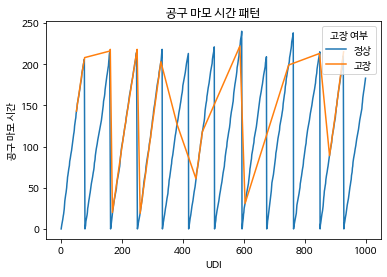

In [63]:
x = df_고장[df_고장.index < 1000].index
y = df_고장[df_고장.index < 1000]['공구 마모 시간']
hue_data = df_고장[df_고장.index < 1000]['고장 여부']

sns.lineplot(x=x, y=y, hue=hue_data)

plt.title('공구 마모 시간 패턴')
plt.xlabel('UDI')
plt.ylabel('공구 마모 시간')

# plt.savefig('pattern:TW.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

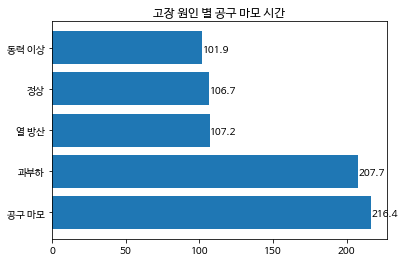

In [64]:
# 고장 원인 별 공구 마모 시간
y = ['정상', '열 방산', '과부하', '동력 이상', '공구 마모']
x = [round(df[df['고장 여부'] == 0]['공구 마모 시간'].sum() / len(df[df['고장 여부'] == 0]['공구 마모 시간']), 1),
     round(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간']), 1),
     round(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간']), 1),
     round(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간']), 1),
     round(df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간']), 1)]

df_tw = pd.DataFrame({'index':y,'value':x})

df_tw_sorted = df_tw.sort_values('value', ascending=False)

plt.barh(df_tw_sorted['index'],df_tw_sorted['value'])

for i, v in enumerate(df_tw_sorted['value']):
    plt.text(v + 0.1, i - 0.1, str(v))

plt.title('고장 원인 별 공구 마모 시간')

# plt.savefig('aver:TW.png', transparent = 'True') -> PT 발표 자료 추출

plt.show()

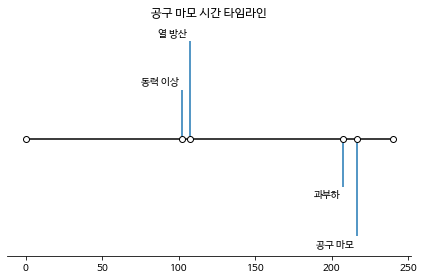

In [68]:
# 공구 마모 시간 타임라인
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

plt.rcParams['font.family'] = 'NanumBarunGothic'

names = ['', '동력 이상', '열 방산', '과부하', '공구 마모', '']
times = [0, 101.9, 107.2, 207.7, 216.4, 240]

levels = np.tile([0, 1, 2, -1, -2, 0], int(np.ceil(len(times)/3)))[:len(times)]

fig, ax = plt.subplots(figsize=(6,4))
ax.set(title = '공구 마모 시간 타임라인')
markerline, stemline, baseline = ax.stem(times, levels, linefmt='C0', basefmt='k-',
                                         use_line_collection=True)

plt.setp(markerline, mec='black', mfc='white', zorder=5)

markerline.set_ydata(np.zeros(len(times)))

vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(times, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext = (-3, np.sign(l)*3,),
                textcoords = 'offset points', va=va, ha='right')
    
ax.get_yaxis().set_visible(False)
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.tight_layout()
# plt.savefig("time_line.png", dpi=1200, transparent = 'True') -> PT 발표 자료 추출

In [69]:
# 공구 교체 시기 측정 코드
from numpy import NaN
df_replace_regular = []
df_replace_error = []
for i in range(len(df) - 1):
    if df['공구 마모 시간'][i+1] > df['공구 마모 시간'][i+2]:
        if df['고장 여부'][i+1] == 0:
            df_replace_regular.append(df['공구 마모 시간'][i+1])
        else:
            df_replace_error.append(df['공구 마모 시간'][i+1])
        # 공구 교체 시기 제외 코드
        df['공구 마모 시간'][i+1] = NaN
df.dropna(inplace=True)

<ipython-input-69-7dc57d1c9fc6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['공구 마모 시간'][i+1] = NaN
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
# 전체 공구 교체 횟수
df_replace = df_replace_regular + df_replace_error
len(df_replace)

119

In [71]:
# 정기 공구 교체 횟수
len(df_replace_regular)

64

In [72]:
# 고장 공구 교체 횟수
len(df_replace_error)

55

In [73]:
# 공구 교체 주기 표
dict_data = {'평균':[sum(df_replace_regular) / len(df_replace_regular),
                   sum(df_replace_error) / len(df_replace_error), 
                   sum(df_replace) / len(df_replace)],
             '최소':[min(df_replace_regular), min(df_replace_error), min(df_replace)],
             '최대':[max(df_replace_regular), max(df_replace_error), max(df_replace)]}
replace = pd.DataFrame(dict_data, index=['정기','고장','전체'])
replace

,평균,최소,최대
정기,215.296875,198.0,246.0
고장,216.072727,198.0,253.0
전체,215.655462,198.0,253.0


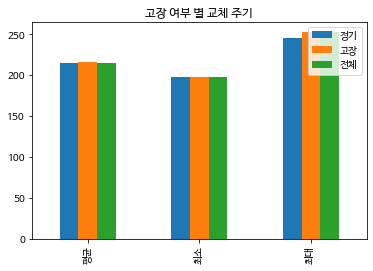

In [74]:
# 공구 교체 주기 시각화
replace.T.plot(kind='bar', title = '고장 여부 별 교체 주기')

plt.legend(loc='upper right')

# plt.savefig("time_replace.png", transparent = 'True') -> PT 발표 자료 추출

In [75]:
# 공구 교체 시기 제외된 고장 갯수 확인
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                       265357.05
공정 온도                                                    364174.35
회전 속도                                                     15204088
회전력                                                       395132.4
공구 마모 시간                                                 1053847.0
고장 여부                                                          284
고장 원인 : 공구 마모                                                    0
고장 원인 : 열 방산                                                   114
고장 원인 : 동력 이상                                                   94
고장 원인 : 과부하                                                     87
고장 원인 : 무작위                                                     17
고장 요인 합계                                                       312
dtype: object

In [ ]:
# 결과 해석 -> 공구 교체 시기(119회)를 제외하니 고장 원인 : 공구 마모(46회)가 0회로 줄어들었다.

# 회귀 분석

In [77]:
# 회귀분석 import
import statsmodels.api as sm

In [78]:
# 종속변수와 독립변수 선택
y = df["고장 여부"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]

In [79]:
X = sm.add_constant(X) # 상수항 추가
model = sm.OLS(y, X).fit() # 최소자승법 적합

In [80]:
# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  고장 여부   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     312.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.88e-311
Time:                        02:54:04   Log-Likelihood:                 4384.7
No. Observations:                9881   AIC:                            -8757.
Df Residuals:                    9875   BIC:                            -8714.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1203      0.062    -18.149      0.0

In [81]:
# 고장 원인 : 열 방산과의 회귀분석
y = df["고장 원인 : 열 방산"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           고장 원인 : 열 방산   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     121.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.23e-124
Time:                        02:54:07   Log-Likelihood:                 8375.8
No. Observations:                9881   AIC:                        -1.674e+04
Df Residuals:                    9875   BIC:                        -1.670e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1235      0.041      2.997      0.0

In [82]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 열 방산과는
# 기온은 양의, 공정 온도는 음의, 회전력과는 양의 상관관계를 갖는다고 해석할 수 있다.

In [83]:
# 고장 원인 : 과부하와의 회귀분석
y = df["고장 원인 : 과부하"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            고장 원인 : 과부하   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     137.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.64e-141
Time:                        02:54:12   Log-Likelihood:                 9736.6
No. Observations:                9881   AIC:                        -1.946e+04
Df Residuals:                    9875   BIC:                        -1.942e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3663      0.036    -10.199      0.0

In [84]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 과부하는
# 회전속도와 회전력, 공구 마모 시간 전부 다 양의 상관관계를 갖는다고 해석할 수 있다.

In [85]:
# 고장 원인 : 동력 이상과의 회귀분석
y = df["고장 원인 : 동력 이상"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          고장 원인 : 동력 이상   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     413.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:54:22   Log-Likelihood:                 9963.6
No. Observations:                9881   AIC:                        -1.992e+04
Df Residuals:                    9875   BIC:                        -1.987e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9807      0.035    -27.940      0.0

In [86]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 동력 이상과는
# 회전속도와 회전력 둘 다 양의 상관관계를 갖는다고 해석할 수 있다.